# Zarr SOSE ds - cleaned version

In [31]:
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(30)
#cluster.adapt(minimum=2, maximum=10)  # or cluster.scale(n) to a fixed size.
client = cluster.get_client()

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [32]:
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.ec7bc449bb6542e5801559eea804872b/status,


In [1]:
client.close()
cluster.close()

NameError: name 'client' is not defined

In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import fsspec
%matplotlib inline

## Open SOSE Dataset from the Cloud

In [3]:
fs = gcsfs.GCSFileSystem(requester_pays=True)

mapping = fs.get_mapper('gcs://pangeo-ecco-sose')

ds = xr.open_zarr(mapping, consolidated=True)
ds

<xarray.Dataset>
Dimensions:   (time: 438, Zl: 42, YC: 320, XC: 2160, Z: 42, XG: 2160, YG: 320, Zp1: 43, Zu: 42)
Coordinates: (12/26)
    Depth     (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    PHrefC    (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    PHrefF    (Zp1) float32 dask.array<chunksize=(43,), meta=np.ndarray>
  * XC        (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.6 359.8 359.9
  * XG        (XG) float32 5.551e-17 0.1667 0.3333 0.5 ... 359.5 359.7 359.8
  * YC        (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -25.04 -24.87 -24.71
    ...        ...
    iter      (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rA        (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAs       (YG, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAw       (YC, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAz       (YG, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables: (12/56)
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ...        ...
    oceFreez  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    oceQsw    (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    oceTAUX   (time, YC, XG) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    oceTAUY   (time, YG, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surForcS  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surForcT  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>

In [4]:
coords = ds.coords.to_dataset().reset_coords()
dsr = ds.reset_coords(drop=True)
dsr

,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,439 Tasks,438 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,439 Tasks,438 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [5]:
dsr.SFLUX

<xarray.DataArray 'SFLUX' (time: 438, YC: 320, XC: 2160)>
dask.array<open_dataset-f0b15a75f993b3b34059ed4b745ba5d9SFLUX, shape=(438, 320, 2160), dtype=float32, chunksize=(1, 320, 2160), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -25.04 -24.87 -24.71
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Attributes:
    long_name:      total salt flux (match salt-content variations), >0 incre...
    standard_name:  SFLUX
    units:          g/m^2/s

In [6]:
ds_tns = xr.merge([dsr.THETA, dsr.SALT])
ds_tns

,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,439 Tasks,438 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,439 Tasks,438 Chunks
Type,float32,numpy.ndarray


In [7]:
ds_vel = xr.merge([dsr.UVEL, dsr.VVEL, dsr.WVEL, dsr.WSLTMASS, dsr.WTHMASS])
ds_vel

,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,439 Tasks,438 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,439 Tasks,438 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


## Create xgcm grid

[Xgcm](http://xgcm.readthedocs.io) is a package which helps with the analysis of GCM data.

In [8]:
import xgcm
grid = xgcm.Grid(ds, periodic=('X', 'Y'))
grid

<xgcm.Grid>
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
X Axis (periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
T Axis (not periodic, boundary=None):
  * center   time
Y Axis (periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center

## Tracer Budgets

Here we will do the heat and salt budgets for SOSE. In integral form, these budgets can be written as

$$
\mathcal{V} \frac{\partial S}{\partial t} = G^S_{adv} + G^S_{diff} + G^S_{surf} + G^S_{linfs}
$$


$$
\mathcal{V} \frac{\partial \theta}{\partial t} = G^\theta_{adv} + G^\theta_{diff} + G^\theta_{surf} + G^\theta_{linfs} + G^\theta_{sw}
$$

where $\mathcal{V}$ is the volume of the grid cell. The terms on the right-hand side are called _tendencies_. They add up to the total tendency (the left hand side).

The first term is the convergence of advective fluxes. The second is the convergence of diffusive fluxes. The third is the explicit surface flux. The fourth is the correction due to the linear free-surface approximation. The fifth is shortwave penetration (only for temperature).

### Flux Divergence

First we define a function to calculate the convergence of the advective and diffusive fluxes, since this has to be repeated for both tracers.

To fix scatter heat plot: 
- Maybe I need to divide by area? https://xgcm.readthedocs.io/en/latest/example_mitgcm.html#Creating-the-grid-object
- Maybe chunking?

In [9]:
def tracer_flux_budget(suffix):
    """Calculate the convergence of fluxes of tracer `suffix` where 
    `suffix` is `TH` or `SLT`. Return a new xarray.Dataset."""
    conv_horiz_adv_flux = -(grid.diff(dsr['ADVx_' + suffix], 'X') +
                          grid.diff(dsr['ADVy_' + suffix], 'Y')).rename('conv_horiz_adv_flux_' + suffix)
    conv_horiz_diff_flux = -(grid.diff(dsr['DFxE_' + suffix], 'X') +
                          grid.diff(dsr['DFyE_' + suffix], 'Y')).rename('conv_horiz_diff_flux_' + suffix)
    # sign convention is opposite for vertical fluxes
    conv_vert_adv_flux = grid.diff(dsr['ADVr_' + suffix], 'Z', boundary='fill').rename('conv_vert_adv_flux_' + suffix)
    conv_vert_diff_flux = (grid.diff(dsr['DFrE_' + suffix], 'Z', boundary='fill') +
                           grid.diff(dsr['DFrI_' + suffix], 'Z', boundary='fill') +
                           grid.diff(dsr['KPPg_' + suffix], 'Z', boundary='fill')).rename('conv_vert_diff_flux_' + suffix)
    
    all_fluxes = [conv_horiz_adv_flux, conv_horiz_diff_flux, conv_vert_adv_flux, conv_vert_diff_flux]
    #conv_all_fluxes = sum(all_fluxes).rename('conv_total_flux_' + suffix)
    #return xr.merge(all_fluxes + [conv_all_fluxes])
    #units: <tracer>m^3/s
    return xr.merge(all_fluxes)

In [10]:
dsr.ADVr_SLT

,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,439 Tasks,438 Chunks
Type,float32,numpy.ndarray


In [11]:
# sum of all converging adv/diff fluxes
budget_slt = tracer_flux_budget('SLT')
budget_slt

,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [12]:
budget_th = tracer_flux_budget('TH')
budget_th

,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [13]:
#SOSE already has tendency terms, unlike ECCO
#adding vol-weighted total tendency per sec

volume = (coords.drF * coords.rA * coords.hFacC)
#client.scatter(volume)
day2seconds = (24*60*60)

budget_th['total_tendency_TH_truth'] = (dsr.TOTTTEND * volume) / day2seconds
budget_slt['total_tendency_SLT_truth'] = (dsr.TOTSTEND * volume) / day2seconds

In [14]:
dsr.TOTSTEND

,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,439 Tasks,438 Chunks
Type,float32,numpy.ndarray


In [ ]:
budget_slt.total_tendency_SLT_truth.mean(dim='time')[0].plot()

In [ ]:
budget_th.total_tendency_TH_truth.mean(dim='time')[0].drop('XC').plot()

In [15]:
budget_th

,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [16]:
budget_slt

,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


### Surface Fluxes

The surface fluxes are only active in the top model layer. We need to specify some constants to convert to the proper units and scale factors to convert to integral form. They also require some xarray special sauce to merge with the 3D variables.

In [18]:
# constants
heat_capacity_cp = 3.994e3 #J/kg/˚C
runit2mass = 1.035e3 #rho

# treat the shortwave flux separately from the rest of the surface flux
surf_flux_th = (dsr.TFLUX - dsr.oceQsw) * coords.rA / (heat_capacity_cp * runit2mass)
lin_fs_correction_th = -(dsr.WTHMASS.isel(Zl=0, drop=True) * coords.rA)

#sw flux
surf_flux_th_sw = dsr.oceQsw * coords.rA / (heat_capacity_cp * runit2mass)

# salt
surf_flux_slt = dsr.SFLUX * coords.rA  / runit2mass
lin_fs_correction_slt = -(dsr.WSLTMASS.isel(Zl=0, drop=True) * coords.rA)
#units: (˚C m^3)/s

# in order to align the surface fluxes with the rest of the 3D budget terms,
# we need to give them a z coordinate. We can do that with this function
#ex nb:
#https://github.com/pangeo-data/pangeo/blob/7415a07bc8a72c3242adebc2bbb6b301131954f7/use_cases/physical-oceanography/SOSE.ipynb
def surface_to_3d(da):
    da = da.copy()
    da.coords['Z'] = dsr.Z[0]
    da = da.expand_dims(dim='Z', axis=1)
    da, _ = xr.align(da, coords.hFacC, join='right')
    return da.fillna(0.)

In [19]:
dsr.SFLUX

<xarray.DataArray 'SFLUX' (time: 438, YC: 320, XC: 2160)>
dask.array<open_dataset-f0b15a75f993b3b34059ed4b745ba5d9SFLUX, shape=(438, 320, 2160), dtype=float32, chunksize=(1, 320, 2160), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -25.04 -24.87 -24.71
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Attributes:
    long_name:      total salt flux (match salt-content variations), >0 incre...
    standard_name:  SFLUX
    units:          g/m^2/s

### Shortwave Flux

Special treatment is needed for the shortwave flux, which penetrates into the interior of the water column

In [20]:
def swfrac(coords, fact=1., jwtype=2):
    """Clone of MITgcm routine for computing sw flux penetration.
    z: depth of output levels"""
    
    rfac = [0.58 , 0.62, 0.67, 0.77, 0.78]
    a1 = [0.35 , 0.6  , 1.0  , 1.5  , 1.4]
    a2 = [23.0 , 20.0 , 17.0 , 14.0 , 7.9 ]
    
    facz = fact * coords.Zl.sel(Zl=slice(0, -200))
    j = jwtype-1
    swdk = (rfac[j] * np.exp(facz / a1[j]) +
            (1-rfac[j]) * np.exp(facz / a2[j]))
            
    return swdk.rename('swdk')

_, swdown = xr.align(dsr.Zl, surf_flux_th_sw * swfrac(coords), join='left', )
swdown = swdown.fillna(0)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [21]:
budget_th = xr.merge([budget_th, 
                      surface_to_3d(surf_flux_th).rename('surface_flux_conv_TH'), 
                      surface_to_3d(lin_fs_correction_th).rename('lin_fs_correction_TH'),
                    (-grid.diff(swdown, 'Z', boundary='fill').fillna(0.)).rename('sw_flux_conv_TH')])
budget_th = budget_th.chunk({'XC':-1, 'YC':-1, 'Z':-1, 'time':1})
budget_th

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,21464 Tasks,438 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,47.37 GiB,110.74 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 320, 2160)"
Count,21464 Tasks,438 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [22]:
budget_slt = xr.merge([budget_slt, 
                       surface_to_3d(surf_flux_slt).rename('surface_flux_conv_SLT'),
                       surface_to_3d(lin_fs_correction_slt).rename('lin_fs_correction_SLT')])
budget_slt = budget_slt.chunk({'XC':-1, 'YC':-1, 'Z':-1, 'time':1})
budget_slt

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,47.37 GiB,110.35 MiB
Shape,"(438, 42, 320, 2160)","(1, 42, 319, 2159)"
Count,21026 Tasks,1752 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


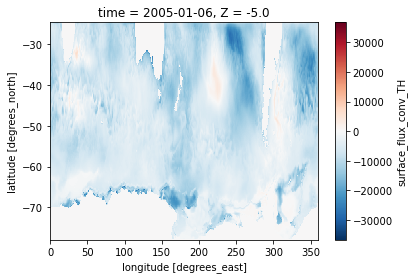

In [24]:
budget_th.surface_flux_conv_TH[0].isel(Z=0).plot()

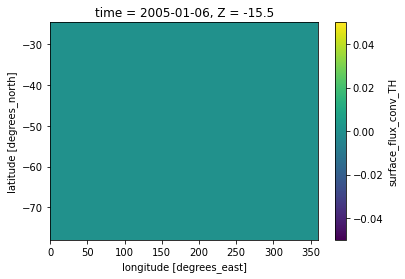

In [25]:
budget_th.surface_flux_conv_TH[0].isel(Z=1).plot()

In [19]:
dsr.SFLUX.attrs

{'long_name': 'total salt flux (match salt-content variations), >0 increases salt',
 'standard_name': 'SFLUX',
 'units': 'g/m^2/s'}

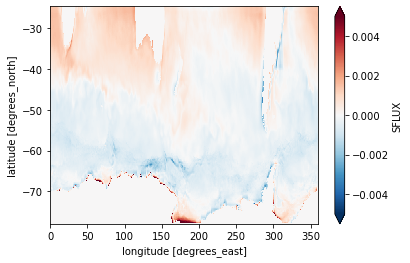

In [26]:
dsr.SFLUX.mean(dim='time').plot(vmax=.005)

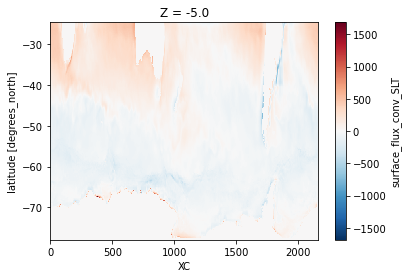

In [21]:
budget_slt.surface_flux_conv_SLT.mean(dim='time')[0].drop('XC').plot()

## **Quick check**

In [23]:
rhs =  (budget_th.surface_flux_conv_TH
        + budget_th.conv_horiz_adv_flux_TH + budget_th.conv_vert_adv_flux_TH
        + budget_th.conv_horiz_diff_flux_TH + budget_th.conv_vert_diff_flux_TH
        + budget_th.sw_flux_conv_TH + budget_th.lin_fs_correction_TH)
lhs = budget_th.total_tendency_TH_truth

In [24]:
#WG boundaries (80˚S, 62˚S, 65˚W, 30˚E)
#WG model's boundaries after .roll(XC=700) (-77.87497˚S, -62.041634˚S; 295.08334W, 30.083334E)
lower_lat = 0
upper_lat = 95
left_lon =  310
right_lon = 880

In [25]:
#set the boundaries
lat_range = dict(YC=slice(lower_lat, upper_lat))
lon_range = dict(XC=slice(left_lon, right_lon))

In [26]:
rhs_wg = rhs.roll(XC=700).isel(**lat_range, **lon_range)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/dataarray.py:3267: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


In [27]:
lhs_wg = lhs.roll(XC=700).isel(**lat_range, **lon_range)

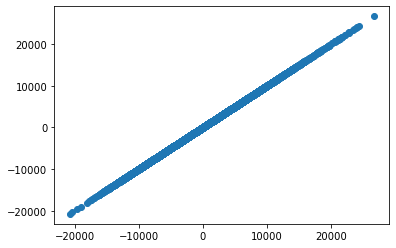

In [29]:
plt.scatter(rhs_wg.isel(time=35).values.ravel(), lhs_wg.isel(time=35).values.ravel())

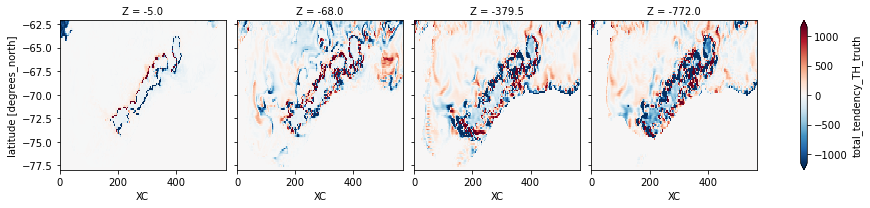

In [30]:
lhs_wg.isel(time=35, Z=[0, 5, 15, 20]).drop('XC').plot(robust=True, col='Z')

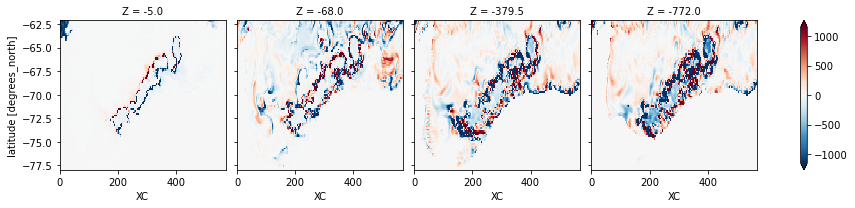

In [31]:
rhs_wg.isel(time=35, Z=[0, 5, 15, 20]).drop('XC').plot(robust=True, col='Z')

### SALT CHECK

In [28]:
rhs_slt =  (budget_slt.surface_flux_conv_SLT
        + budget_slt.conv_horiz_adv_flux_SLT + budget_slt.conv_vert_adv_flux_SLT
        + budget_slt.conv_horiz_diff_flux_SLT + budget_slt.conv_vert_diff_flux_SLT
        + budget_slt.lin_fs_correction_SLT)
lhs_slt = budget_slt.total_tendency_SLT_truth

In [29]:
rhs_slt_wg = rhs_slt.roll(XC=700).isel(**lat_range, **lon_range)

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/dataarray.py:3267: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


In [30]:
lhs_slt_wg = lhs_slt.roll(XC=700).isel(**lat_range, **lon_range)

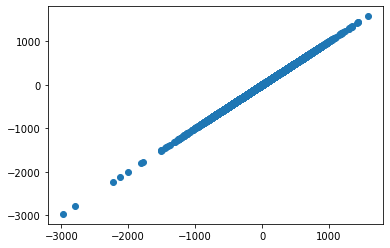

In [33]:
plt.scatter(rhs_slt_wg.isel(time=35).values.ravel(), lhs_slt_wg.isel(time=35).values.ravel())

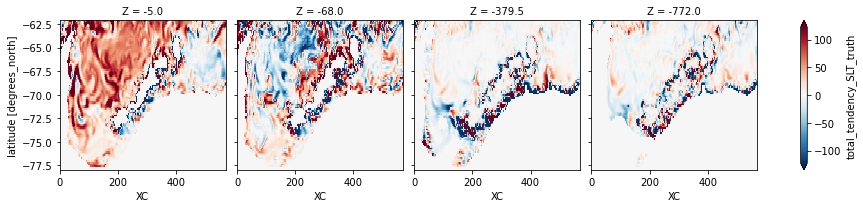

In [34]:
lhs_slt_wg.isel(time=35, Z=[0, 5, 15, 20]).drop('XC').plot(robust=True, col='Z')

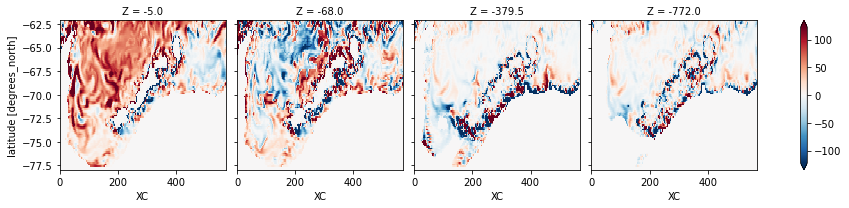

In [35]:
rhs_slt_wg.isel(time=35, Z=[0, 5, 15, 20]).drop('XC').plot(robust=True, col='Z')

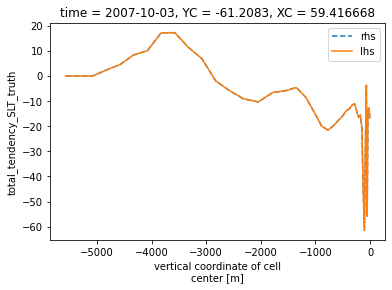

In [36]:
rhs_slt[200,:,100,356].plot(label='rhs', linestyle='--')
lhs_slt[200,:,100,356].plot(label='lhs')
plt.legend()

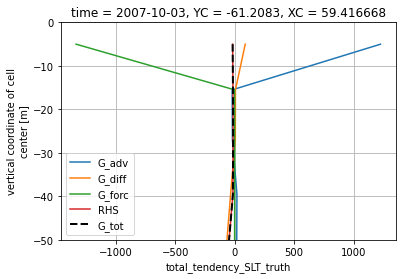

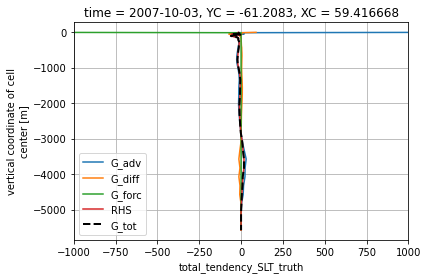

In [38]:
for xlim in [None, 1e3]:
    plt.figure()
    (budget_slt.conv_horiz_adv_flux_SLT[200,:,100,356] + budget_slt.conv_vert_adv_flux_SLT[200,:,100,356]).plot(y='Z', label='G_adv')
    (budget_slt.conv_horiz_diff_flux_SLT[200,:,100,356] + budget_slt.conv_vert_diff_flux_SLT[200,:,100,356]).plot(y='Z', label='G_diff')
    (budget_slt.surface_flux_conv_SLT[200,:,100,356] + budget_slt.lin_fs_correction_SLT[200,:,100,356]).plot(y='Z', label='G_forc')
    rhs_slt[200,:,100,356].plot(y='Z', label='RHS')   
    budget_slt.total_tendency_SLT_truth[200,:,100,356].plot(y='Z', label='G_tot', color='k', ls='--', linewidth=2)   
    if xlim:
        plt.xlim([-xlim, xlim])
    else:
        plt.ylim([-50, 0])

    plt.grid()
    plt.legend()

## Saving Data

In [39]:
import json
with open('/home/jovyan/WMT-project/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [ ]:
#saving salt budget
gcsmap_slt = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/budget_slt_fixed.zarr')
budget_slt.to_zarr(gcsmap_slt, mode='w') #writing the dataset into a file with the specified path

In [ ]:
#saving heat budget
gcsmap_th = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/budget_th.zarr')
budget_th.to_zarr(gcsmap_th, mode='w')

In [ ]:
#saving unrolled coords
gcsmap_coords = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/coords.zarr')
coords.to_zarr(gcsmap_coords, mode='w')

In [ ]:
#saving unrolled T/S vars
gcsmap_tns = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/ds_tns.zarr')
ds_tns.to_zarr(gcsmap_tns, mode='w')

In [ ]:
#saving unrolled velocity vars
gcsmap_vel = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/ds_vel.zarr')
ds_vel.to_zarr(gcsmap_vel, mode='w')

In [ ]:
dsr.SIempmr

In [ ]:
ds_SIempmr = dsr.SIempmr.to_dataset()

In [ ]:
ds_SIempmr

In [ ]:
#saving unrolled ocean surf fw flux 
gcsmap_empmr = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/ds_SIempmr.zarr')
ds_SIempmr.to_zarr(gcsmap_empmr, mode='w')

## WG entire column

In [ ]:
#index locations corresponding to above lat/lon coordinates
lower_lat_lower = 0
upper_lat_lower = 71
left_lon_lower = 1794
right_lon_lower = 2159

lower_cell_range = dict(Zl=[27, 42])
lower_cell_range_z = dict(Z=slice(27, 42))

In [ ]:
#set the boundaries
lat_range_lower = dict(YC=slice(lower_lat_lower, upper_lat_lower))
lon_range_lower = dict(XC=slice(left_lon_lower, right_lon_lower))

**If this is discretized, since we're on individual grid-pt level, I don't need to define a lower range z for interior?**

In [ ]:
budget_slt_wg = budget_slt.isel(**lat_range_lower, **lon_range_lower)

In [ ]:
budget_th_wg = budget_th.isel(**lat_range_lower, **lon_range_lower)
budget_th_wg

In [ ]:
budget_th_wg['total_tendency_TH'] = (budget_th_wg.conv_horiz_adv_flux_TH + budget_th_wg.conv_horiz_diff_flux_TH 
                                     + budget_th_wg.surface_flux_conv_TH + budget_th_wg.lin_fs_correction_TH)

In [ ]:
budget_slt_wg['total_tendency_SLT'] = (budget_slt_wg.conv_horiz_adv_flux_SLT + 
                                       budget_slt_wg.conv_horiz_diff_flux_SLT + 
                                       budget_slt_wg.surface_flux_conv_SLT + 
                                       budget_slt_wg.lin_fs_correction_SLT)

In [ ]:
budget_th_wg

In [ ]:
import dask
dask.compute?

In [ ]:
tmp = dask.compute(budget_th_wg.conv_horiz_diff_flux_TH.sum(dim=['XC', 'YC', 'Z']), retries=5)

In [ ]:
rhs_th = budget_th_wg.total_tendency_TH.sum(dim=['XC', 'YC', 'Z']).load()

In [ ]:
lhs_th = budget_th_wg.total_tendency_TH_truth.sum(dim=['XC', 'YC', 'Z']).load()

In [ ]:
plt.figure(figsize=(12,6))
rhs_th.plot(label='rhs')
lhs_th.plot(label='lhs')
plt.legend();

In [ ]:
budget_slt_wg

In [ ]:
rhs_slt = budget_slt_wg.total_tendency_SLT.sum(dim=['XC', 'YC', 'Z']).load()
lhs_slt = budget_slt_wg.total_tendency_SLT_truth.sum(dim=['XC', 'YC', 'Z']).load()

In [ ]:
plt.figure(figsize=(12,6))
rhs_slt.plot(label='rhs')
lhs_slt.plot(label='lhs')
plt.legend();

## WG Interior

In [ ]:
rhs_th_lower = budget_th_wg.total_tendency_TH.isel(**lower_cell_range_z).sum(dim=['XC', 'YC', 'Z']).load()
lhs_th_lower = budget_th_wg.total_tendency_TH_truth.isel(**lower_cell_range_z).sum(dim=['XC', 'YC', 'Z']).load()

In [ ]:
plt.figure(figsize=(12,6))
rhs_th_lower.plot(label='rhs')
lhs_th_lower.plot(label='lhs')
plt.legend();

In [ ]:
rhs_slt_lower = budget_slt_wg.isel(**lower_cell_range_z).total_tendency_SLT.sum(dim=['XC', 'YC', 'Z']).load()
lhs_slt_lower = budget_slt_wg.isel(**lower_cell_range_z).total_tendency_SLT_truth.sum(dim=
                                                                                      ['XC', 'YC', 'Z']).load()

In [ ]:
plt.figure(figsize=(12,6))
rhs_slt_lower.plot(label='rhs')
lhs_slt_lower.plot(label='lhs')
plt.legend();